# A detailed look at some of the SuSiE fits

In comparison with CAVIAR follow-ups; workflow implemented in [this notebook](20180704_MolecularQTL_Workflow.html).

## Example 1

> /home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/CAVIAR_follow_up/chr11_63987798_63988488_clu_2010.CAVIAR.png (241.4 KiB):

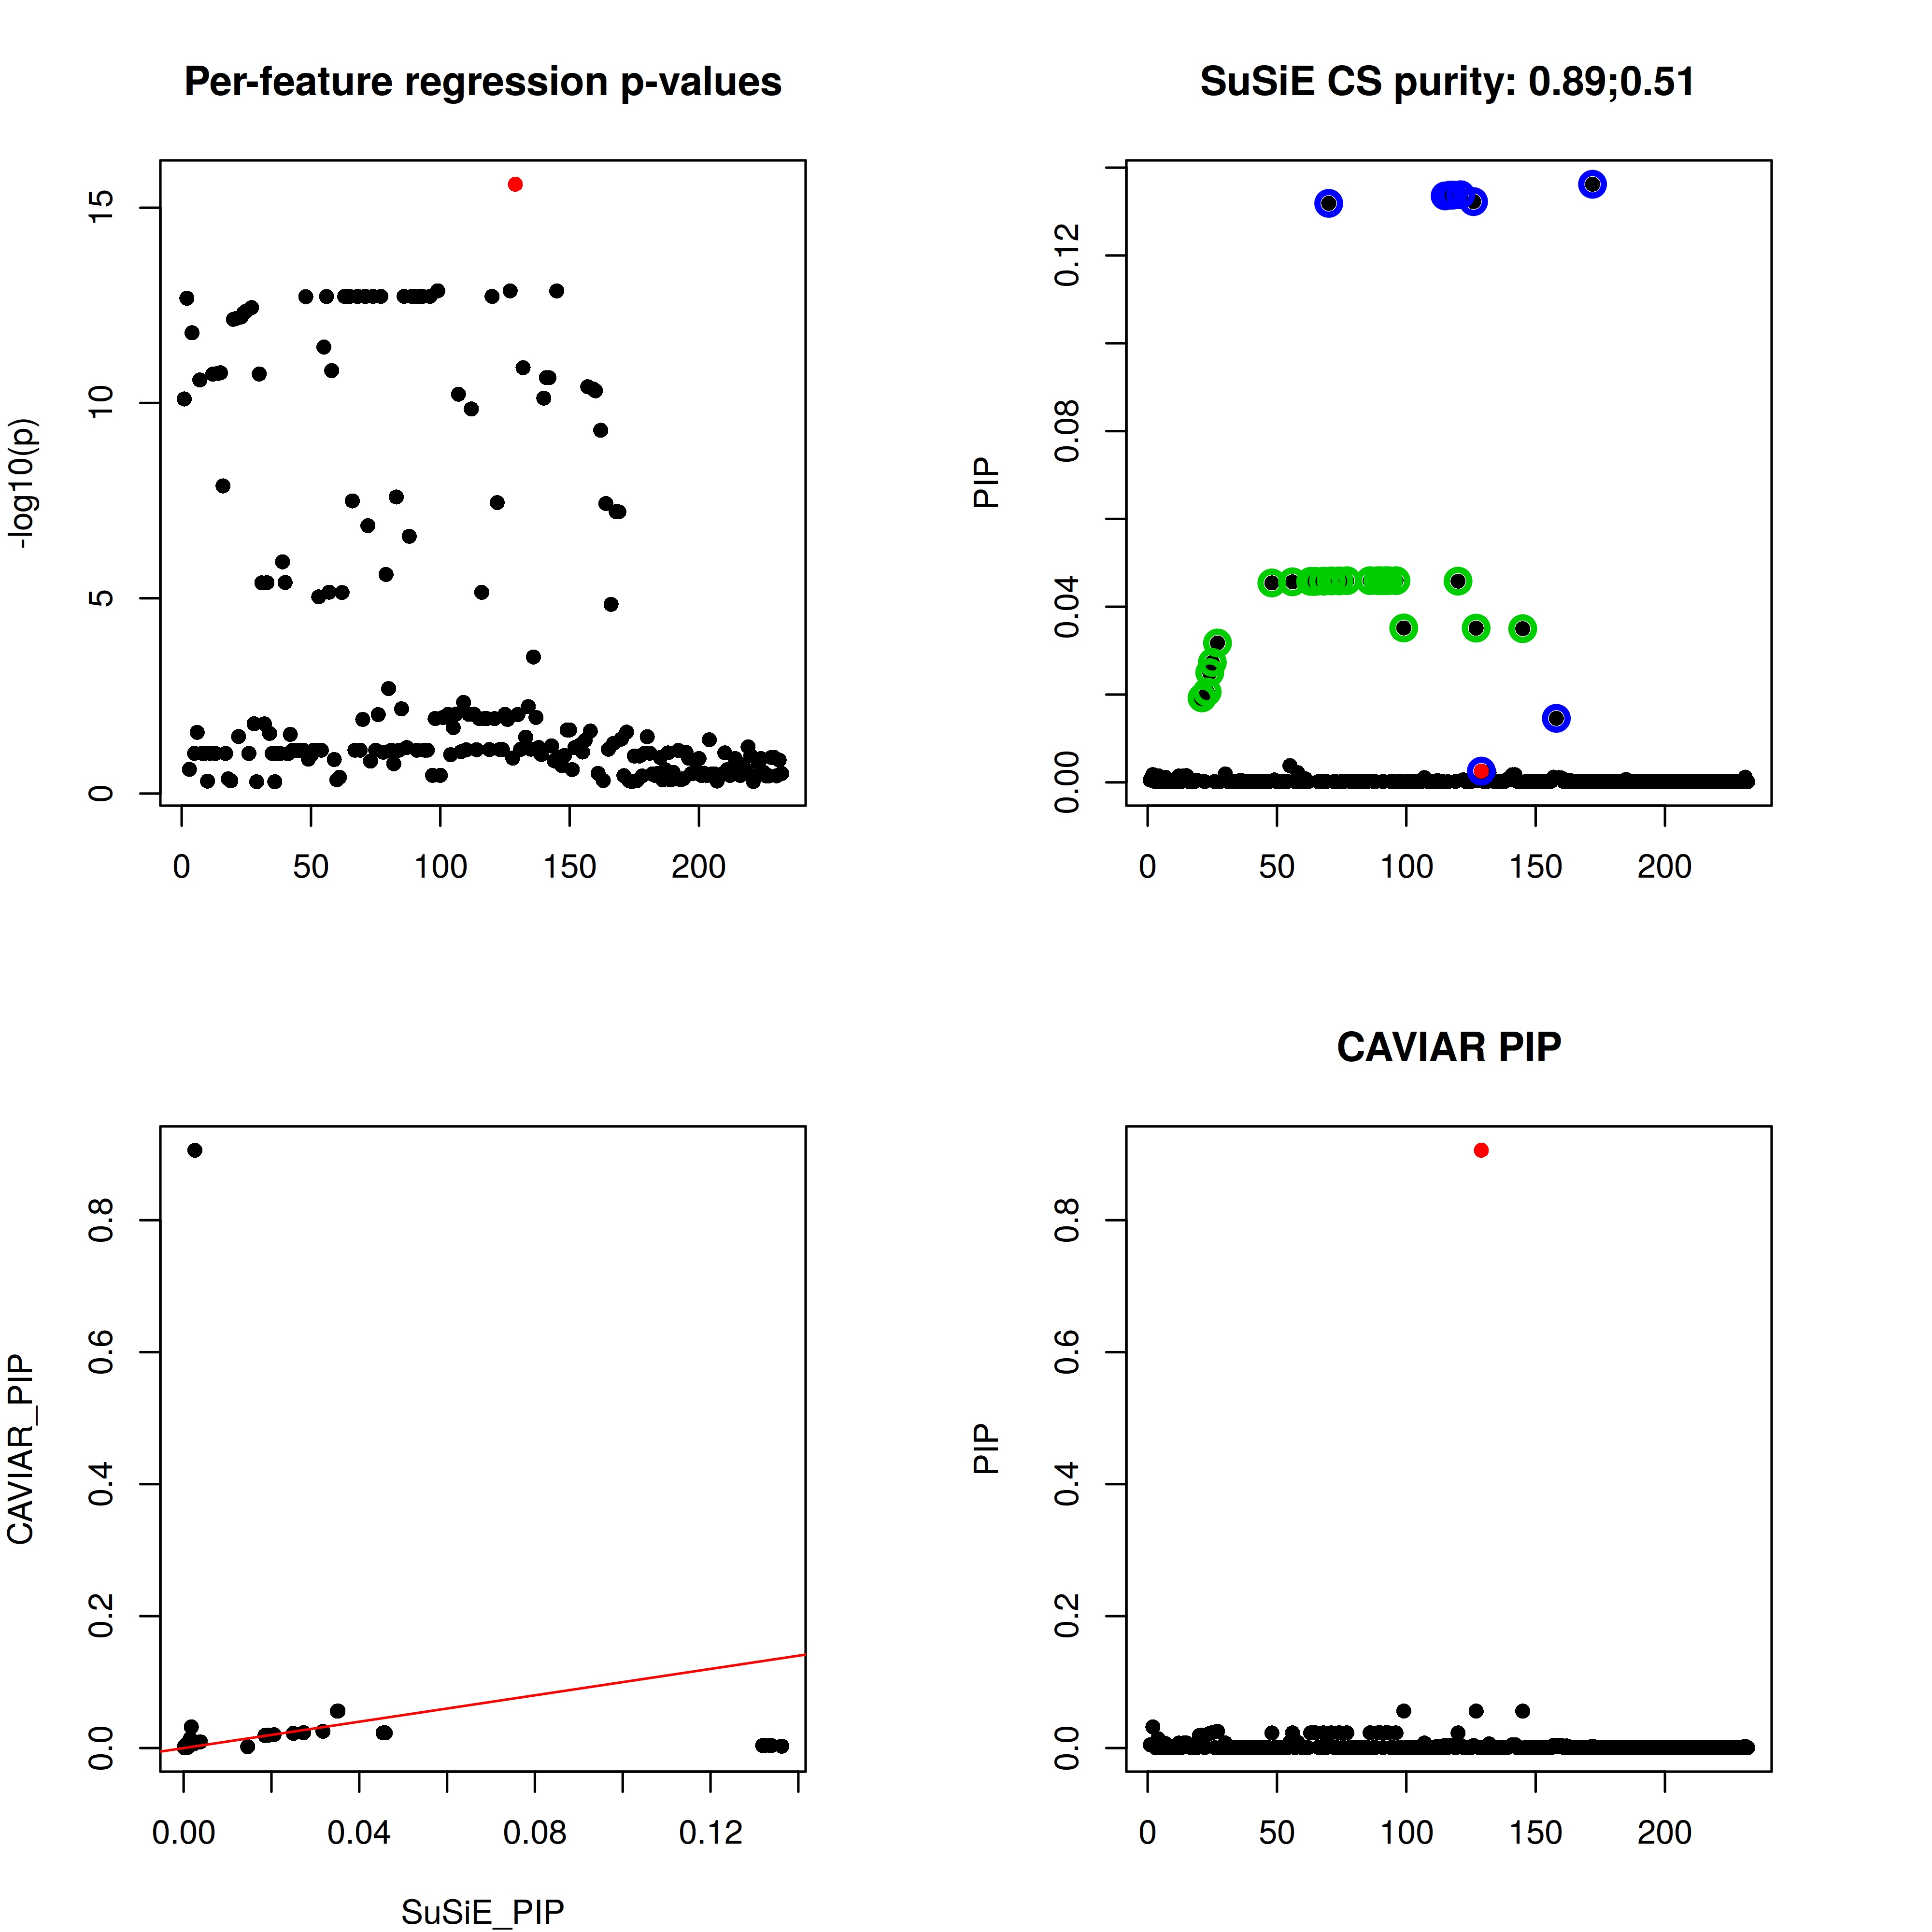

In [1]:
%preview /home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/CAVIAR_follow_up/chr11_63987798_63988488_clu_2010.CAVIAR.png

We trace back to its input data-set and see what is going on.

In [2]:
ls /home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_*/chr11_63987798_63988488_clu_2010*

/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr11_63987798_63988488_clu_2010.log
/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr11_63987798_63988488_clu_2010.png
/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr11_63987798_63988488_clu_2010.rds


In [3]:
fn = "/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr11_63987798_63988488_clu_2010.rds"
susie = readRDS(fn)
dat = readRDS(susie$input)[[susie$idx]]
saveRDS(dat, "~/chr11_63987798_63988488_clu_2010_data.rds")

In [4]:
x = susieR:::safe_colScale(dat$X,center=TRUE, scale = TRUE)
y = dat$y - mean(dat$y)
reg = susieR:::univariate_regression(x,y)
z_score = reg$betahat/reg$sebetahat
top_idx = which.max(abs(z_score))
pve = var(x[,top_idx] * reg$betahat[top_idx]) / var(y)
b = rep(0, length(pip))
b[top_idx] = 1

In [5]:
pve

[1] 0.4363267

In [6]:
dat$pve

[1] 0.4363267

## Set prior variance to PVE estimate

In [25]:
library(susieR)
set.seed(1)
fitted = susie(dat$X, dat$y, L=5,
               estimate_residual_variance=TRUE, 
               prior_variance=dat$pve,
               tol=1e-3)
sets = susie_get_CS(fitted,
            coverage = 0.95,
            X = dat$X, 
            min_abs_corr = 0.4)
pip = susie_get_PIP(fitted, sets$cs_index)

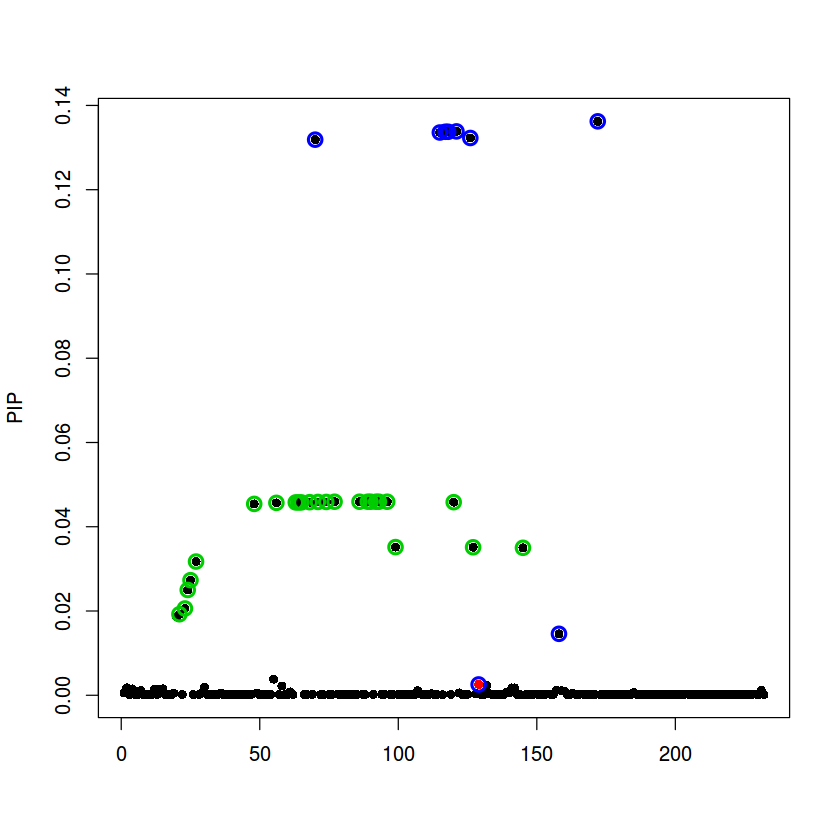

In [26]:
susie_pplot(pip, fitted = fitted, CS = sets, max_cs = 0.4, dtype='PIP',b=b)

However, if I set `L=2` as I did for CAVIAR (`-c 2`), the result is more consistent with CAVIAR.

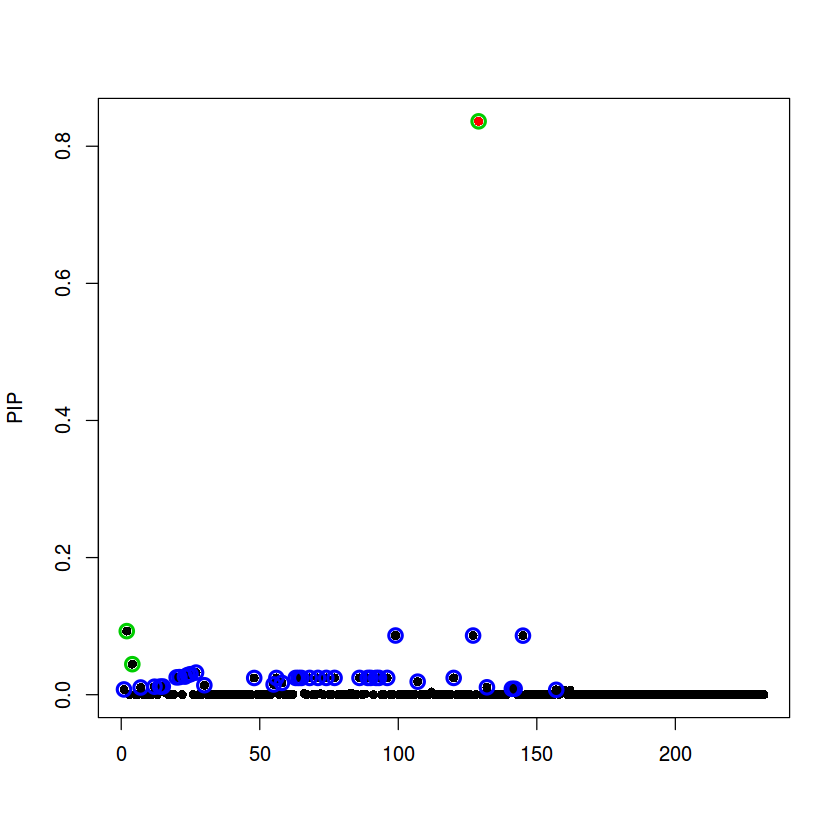

In [28]:
set.seed(1)
fitted = susie(dat$X, dat$y, L=2,
               estimate_residual_variance=TRUE, 
               prior_variance=dat$pve,
               tol=1e-3)
sets = susie_get_CS(fitted,
            coverage = 0.95,
            X = dat$X, 
            min_abs_corr = 0.4)
pip = susie_get_PIP(fitted, sets$cs_index)
susie_pplot(pip, fitted = fitted, CS = sets, max_cs = 0.4, dtype='PIP',b=b)